## Passing & Creativity Stats

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import data
df = pd.read_csv("players_data-2024_2025.csv")
df.fillna(0, inplace=True)

## Top 5 Assist Providers

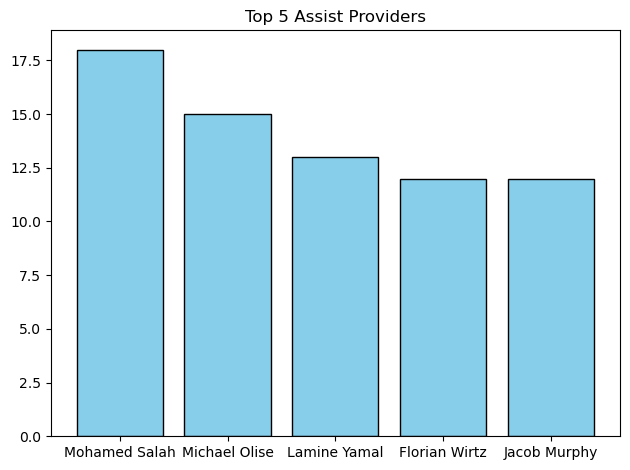

In [3]:
top_assists = df[['Player', 'Ast']].sort_values(by='Ast', ascending=False).head(5).reset_index(drop=True)
plt.bar(top_assists["Player"], top_assists["Ast"], color="#87CEEB", edgecolor="black")
plt.title("Top 5 Assist Providers")
plt.tight_layout()

## Top 5 Expected Assists

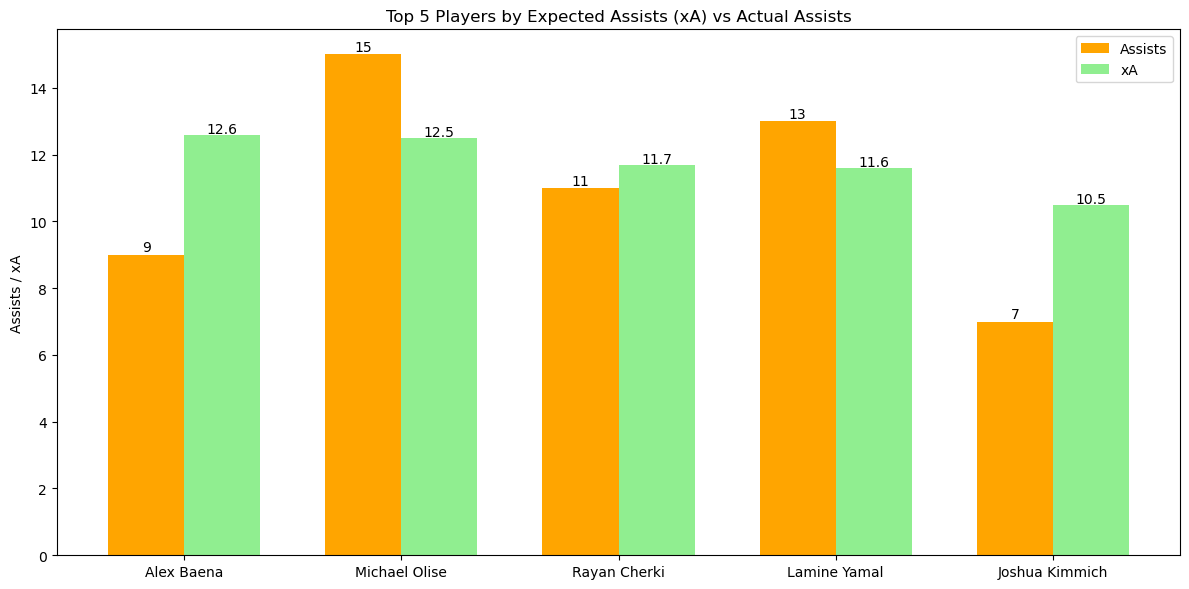

In [4]:
top_xa_assists = df[['Player', 'xA', 'Ast']].sort_values(by='xA', ascending=False).head(5).reset_index(drop=True)
x = np.arange(len(top_xa_assists))
width = 0.35

plt.figure(figsize=(12,6))
bars1 = plt.bar(x - width/2, top_xa_assists['Ast'], width, label='Assists', color='orange')
bars2 = plt.bar(x + width/2, top_xa_assists['xA'], width, label='xA', color='lightgreen')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f"{int(bar.get_height())}", ha='center', fontsize=10)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f"{bar.get_height():.1f}", ha='center', fontsize=10)

plt.xticks(x, top_xa_assists['Player'])
plt.ylabel("Assists / xA")
plt.title("Top 5 Players by Expected Assists (xA) vs Actual Assists")
plt.legend()
plt.tight_layout()
plt.show()

## Progressive Passes (PrgP) vs Progressive Carries (PrgC)

In [8]:
top_PrgP = df[['Player', 'PrgP','PrgC', 'KP']].sort_values(by='PrgP', ascending=False).head(5).reset_index(drop=True)
top_PrgC = df[['Player', 'PrgC','PrgP', 'KP']].sort_values(by='PrgC', ascending=False).head(5).reset_index(drop=True)

# Step 2: Merge top players
top_progress = pd.merge(top_PrgP, top_PrgC, on='Player', how='outer', suffixes=('_PrgP', '_PrgC'))
top_progress = top_progress.fillna(0).reset_index(drop=True)

# Step 3: Create total Key Passes column for bubble size
top_progress['Total_KP'] = top_progress['KP_PrgP'] + top_progress['KP_PrgC']

# Step 4: Plot bubble chart
plt.figure(figsize=(12,7))
scatter = plt.scatter(
    top_progress['PrgP'],           # X-axis: Progressive Passes
    top_progress['PrgC'],           # Y-axis: Progressive Carries
    s=top_progress['Total_KP']*5,   # Bubble size (scaled)
    c='skyblue',                     # Bubble color
    alpha=0.6,                       # Transparency
    edgecolors='black',
    linewidth=1.2
)

# Step 5: Annotate player names
for i, player in enumerate(top_progress['Player']):
    plt.text(
        top_progress['PrgP'][i]+2, 
        top_progress['PrgC'][i]+2, 
        player, 
        fontsize=10,
        weight='bold'
    )

# Step 6: Labels and title
plt.xlabel("Progressive Passes (PrgP)", fontsize=12)
plt.ylabel("Progressive Carries (PrgC)", fontsize=12)
plt.title("Top Players – Progressive Passes vs Carries (Bubble size = Key Passes)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

KeyError: 'PrgP'

<Figure size 1200x700 with 0 Axes>